<h1 style="text-align:center"> Stack Overflow: Tag Prediction </h1>

<h1>1. Business Problem </h1>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>

<h2> 1.2 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2. Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>

<h1> 3. Exploratory Data Analysis </h1>

In [72]:
# importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#### Reading Data  

In [8]:

data = pd.read_csv("Train.csv")
data.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [9]:
data.shape

(6034195, 4)

#### Checking counts of tags or multi lables in single datapoint

In [17]:
counts = data.Tags.apply(lambda x: len(str(x).split()))

counts.value_counts()

3    1728500
2    1608230
4    1156927
1     830591
5     709947
Name: Tags, dtype: int64

observation -

1] There are 1,728,500 datapoints who have 3 tags

2] 2 Tags are present in 1,608,230 datapoints and etc

#### Checking for duplicates

In [19]:
duplicates = data.sort_values(by = ["Title", "Body", "Tags"])

In [20]:
duplicates

,Id,Title,Body,Tags
1078064,1078065,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c
940625,940626,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
1484627,1484628,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
1074874,1074875,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl
3153907,3153908,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc
3954565,3954566,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc
4191168,4191169,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk
1148019,1148020,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web
5151142,5151143,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web
5237557,5237558,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web


In [25]:
# droping duplicates 

data_no_duplicates = data.drop_duplicates(subset=["Title", "Body", "Tags"],keep="first", inplace=False)
print(data_no_duplicates.shape[0])

percent = ((data.shape[0]-data_no_duplicates.shape[0])*100)/data.shape[0]

print(f"Out of {data.shape[0]}, {data.shape[0]-data_no_duplicates.shape[0]} were duplicates i.e {np.round(percent,3)}% of datapoints were duplicates")

4206314
Out of 6034195, 1827881 were duplicates i.e 30.292% of datapoints were duplicates


#### Checking for null values

In [30]:
data_no_duplicates[data_no_duplicates.isnull().any(1)]

,Id,Title,Body,Tags
895318,895319,Do we really need NULL?,<blockquote>\n <p><strong>Possible Duplicate:...,NaN
1030863,1030864,Page cannot be null. Please ensure that this o...,<p>I get this error when i remove dynamically ...,NaN
1467813,1467814,How do Germans call null,"<p>In german null means 0, so how do they call...",NaN
1927902,1927903,"What is the difference between NULL and ""0""?","<p>What is the difference from NULL and ""0""?</...",NaN
2614271,2614272,a bit of difference between null and space,<p>I was just reading this quote</p>\n\n<block...,NaN
3196708,3196709,Handle NullObjects,<p>I have done quite a bit of research on best...,NaN
4144270,4144271,Find all values that are not null and not in a...,<p>I am running into a problem which results i...,NaN


In [31]:
# dropping null values
data_no_duplicates = data_no_duplicates.dropna()

In [35]:
print(len(data_no_duplicates[data_no_duplicates.isnull().any(1)]))
print(data_no_duplicates.shape[0])

0
4206307


In [36]:
# Saving droped duplicates data into csv
data_no_duplicates.to_csv("train.csv", index=False)

In [37]:
data = data_no_duplicates

<h1> 3.1. Tag Analysis </h1>

<h3> 3.1.1 Total number of unique tags </h3>

In [88]:
# Number of unique tags

vectorizer = CountVectorizer(tokenizer= lambda x : x.split())
tags = vectorizer.fit_transform(data.Tags)

tag_names = vectorizer.get_feature_names()
print(" Number of unique tags in Tags are : ", len(tag_names))

 Number of unique tags in Tags are :  42048


In [89]:
# some of the tags are
print(tag_names[:100])

['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc', '.mobi', '.mov', '.net', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.0-rc1', '.net-4.5', '.net-assembly', '.net-authorization', '.net-bcl', '.net-bugs', '.net-cf-3.5', '.net-client-profile', '.net-compact', '.net-framework', '.net-framework-source', '.net-framework-version', '.net-gadgeteer', '.net-install', '.net-internals', '.net-interview', '.net-micro-framework', '.net-reflector', '.net-remoting', '.net-security', '.net-services', '.net2.0', '.net3.5', '.net4.0', '.netrc', '.nettiers', '.obj', '.post', '.procmailrc', '.profile', '.railsrc', '.rdlc', '.refresh', '.sbr', '.screenrc', '.sdf', '.sys', '.vdproj', '.war', '.wav', '.when', '.x', '10.8', '1080p', '10gbethernet', '10gen-csharp-driver', '10gige', '110', '11

<h3> 3.1.2 Number of times a tag appeared </h3>

In [93]:
# frequency of each tag
tags_freq = tags.sum(axis=0).A1

In [131]:
tags_count = pd.DataFrame([tag_names, tags_freq], index=["Tags", "Frequency"]).T

In [132]:
tags_count = tag_counts.sort_values(by="Frequency", ascending=False)
tags_count.head(10)

,Tags,Frequency
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436
18608,jquery,221533
4346,c++,143936
29101,python,134137
17643,iphone,128681
2215,asp.net,125651


Observation- 

We can se that the top most used tags are c#, java, php,javascript etc

<h3> 3.1.3 Graphical Analysis of tags</h3>

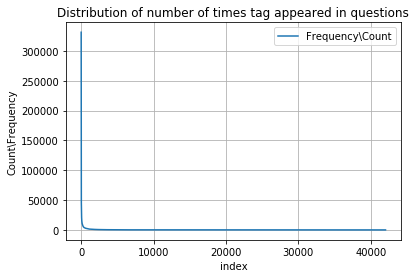

In [135]:
plt.plot(tags_count.Frequency.values, label="Frequency\Count")
plt.xlabel("index")
plt.ylabel("Count\Frequency")
plt.title("Distribution of number of times tag appeared in questions")
plt.legend()
plt.grid()
plt.show()

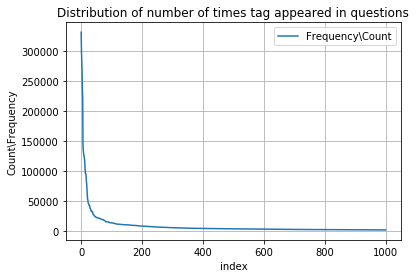

In [136]:
plt.plot(tags_count.Frequency.values[:1000], label="Frequency\Count")
plt.xlabel("index")
plt.ylabel("Count\Frequency")
plt.title("Distribution of number of times tag appeared in questions")
plt.legend()
plt.grid()
plt.show()

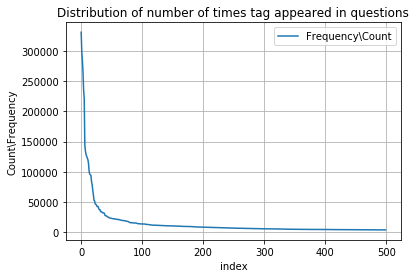

In [137]:
plt.plot(tags_count.Frequency.values[:500], label="Frequency\Count")
plt.xlabel("index")
plt.ylabel("Count\Frequency")
plt.title("Distribution of number of times tag appeared in questions")
plt.legend()
plt.grid()
plt.show()

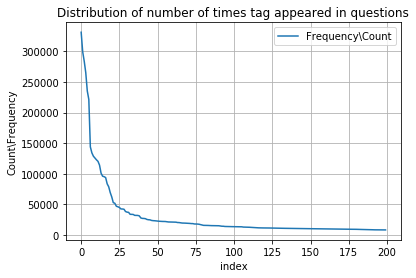

In [138]:
plt.plot(tags_count.Frequency.values[:200], label="Frequency\Count")
plt.xlabel("index")
plt.ylabel("Count\Frequency")
plt.title("Distribution of number of times tag appeared in questions")
plt.legend()
plt.grid()
plt.show()

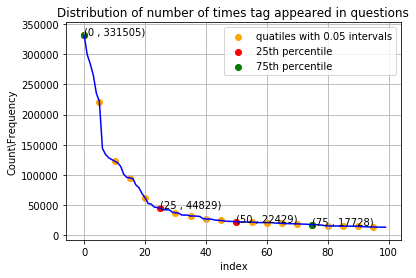

In [156]:
plt.plot(tags_count.Frequency.values[:100], "b")
plt.scatter(x = range(0,100,5) ,y=tags_count.Frequency.values[0:100:5], c="orange",label="quatiles with 0.05 intervals")
plt.scatter(x = range(0,100,25) ,y=tags_count.Frequency.values[0:100:25], c="red",label="25th percentile")
plt.scatter(x = range(0,100,75) ,y=tags_count.Frequency.values[0:100:75], c="green",label="75th percentile")
for x,y in zip(list(range(0,100,25)), tags_count.Frequency.values[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.xlabel("index")
plt.ylabel("Count\Frequency")
plt.title("Distribution of number of times tag appeared in questions")
plt.legend()
plt.grid()
plt.show()

#### Max, Mean, Min  and Percentile 

In [170]:
count = tags_count.Frequency.values
print("Max count a tag has occured: ", max(count))

print("Mean count of tag occurence : ", np.mean(count))

print("Least count a tag has occurence : ", min(count))

print("25th percentile : ", np.percentile(count, 25))

print("50th percentile : ", np.percentile(count, 50))

print("75th percentile : ", np.percentile(count, 75))

print("100th percentile : ", np.percentile(count, 100))

Max count a tag has occured:  331505
Mean count of tag occurence :  290
Least count a tag has occurence :  1
25th percentile :  5.0
50th percentile :  17.0
75th percentile :  66.0
100th percentile :  331505.0


Observation - 

Above analysis tell that 25 percent of tags occur more than 66 times and 75 percent of tags count is less than 66.

In [186]:
print("Number of tags whose count is more than 66 : ", len(tags_count[tags_count.Frequency >66]))

print("Number of tags whose count is more than 10,000 : ",len(tags_count[tags_count.Frequency > 10000]))

print("Number of tags whose count is more than 100,000 : ",len(tags_count[tags_count.Frequency > 100000]))

Number of tags whose count is more than 66 :  10502
Number of tags whose count is more than 10,000 :  153
Number of tags whose count is more than 100,000 :  14


Observation - 

Only 10502 tags count is more than 66 out of 42048 which is very less.

While only 153 tags have frequency more than 10,000 and 14 tags have count more than 100,000.

Most frequent tag (i.e. c#) is used 331505 times.

#### Wordcloud

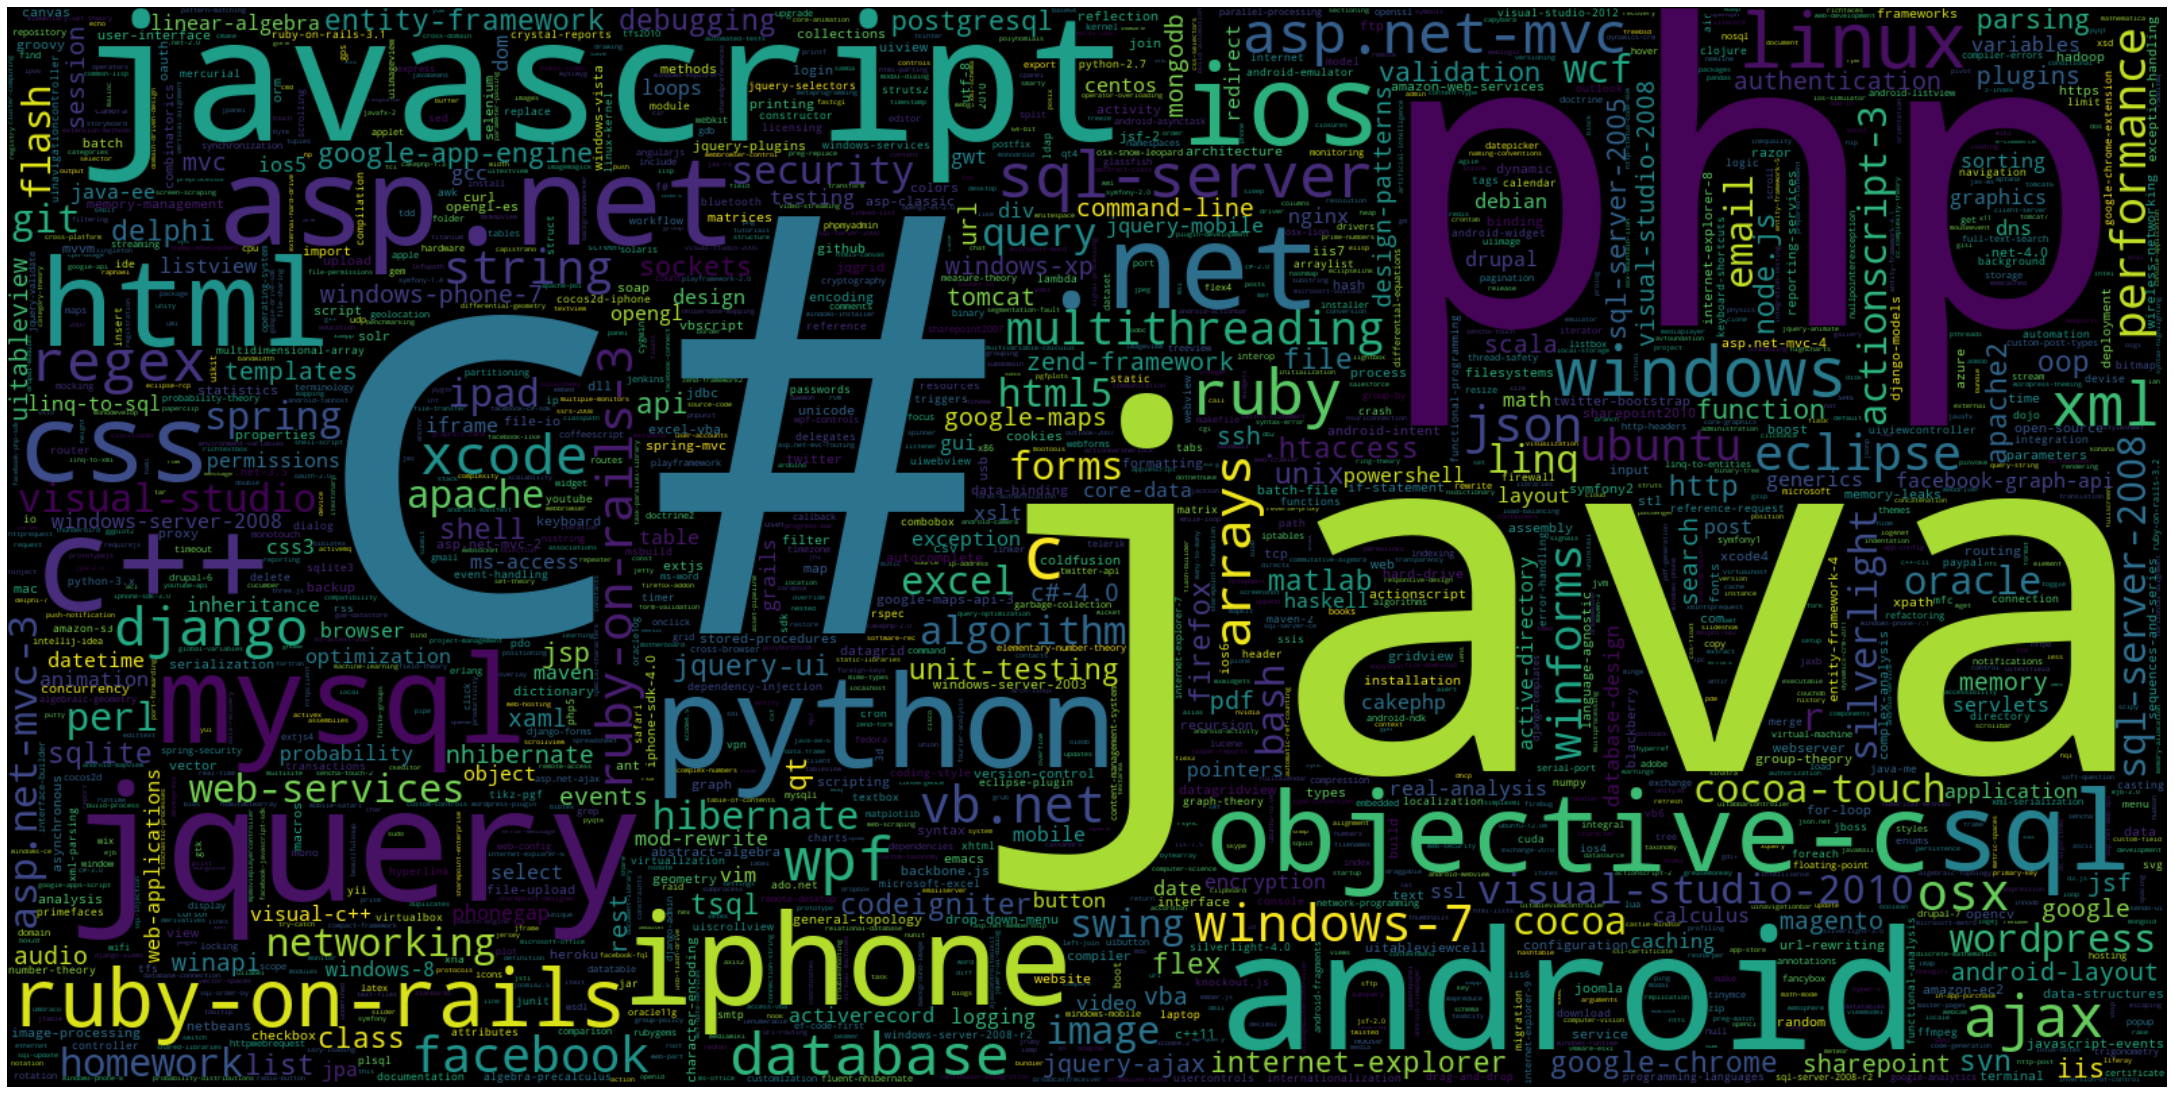

In [224]:
count_dict = dict(zip(tags_count.Tags,tags_count.Frequency))
fig = plt.figure(figsize=(30,20))
wordcloud = WordCloud(width=1600, height=800, background_color="black", max_words=len(count_dict)).generate_from_frequencies(count_dict)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.1.4 Tags Per Question </h3>

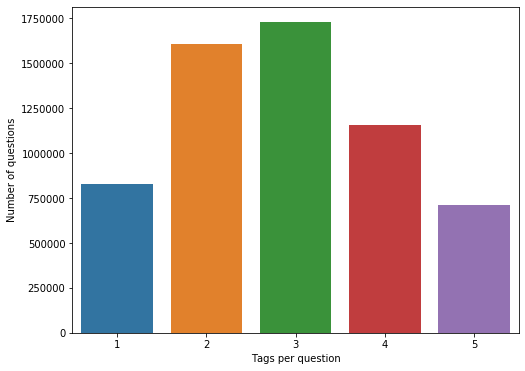

In [234]:
plt.figure(figsize=(8,6))
sns.barplot(x= counts.value_counts().index, y=counts.value_counts().values)
plt.xlabel("Tags per question")
plt.ylabel("Number of questions")
plt.show()

In [248]:
print("Avg number of tags per question : ",np.mean(counts))

Avg number of tags per question :  2.885222303886434


<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.885
4. Most of the questions are having 2 or 3 tags

#### Top 20 Tags 

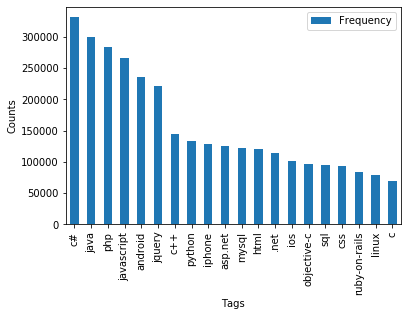

In [272]:
tags_count.head(20).plot(kind="bar")
plt.xticks(range(20), tags_count['Tags'])
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h2> 3.2 Cleaning and preprocessing of Questions </h2>

<ol> 
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [ ]:
# taking 1M smaples out of 4M 

data = data[0:1000000]

In [ ]:
# finding code from body and storing into code column

def code(text):
    code = re.findall("<code>(.*?)</code>", text, flags=re.DOTALL)
    return (" ".join(code)).strip()
data["code"] = data.Body.apply(code)

In [ ]:
# rem0ving code from body 
data["Body"] = data.Body.apply(lambda x : re.sub("<code>(.*?)</code>", "",x, flags=re.MULTILINE|re.DOTALL))

In [ ]:
data["Body"] = data.Body.apply(lambda x: BeautifulSoup(x, "lxml").get_text())

In [ ]:
data["Title"] = data.Title.apply(lambda x: BeautifulSoup(x, "lxml").get_text())

In [299]:
stopwords = set(STOPWORDS)

In [ ]:
def clean(row):
    title = row.Title
    body = row.Body

    question = str(title) +" "+ str(body)

    question = question.lower()
    question = re.sub("c\#", "csharp", question)
    question = re.sub("[^a-zA-Z\s]", "", question)
    question = re.sub("\s+", " ", question)
    stemmer = SnowballStemmer(language="english")
    question = (" ".join(stemmer.stem(word) for word in question.split() if word not in stopwords and (len(word)!=1 or word != "c"))).strip()

    return question

data["question"] = data[['Title','Body']].apply(clean, axis=1)

In [ ]:
# saving processed data for future use
data.to_csv("data_preprocessed.csv", index=False)

In [310]:
data.head()

,Id,Title,Body,Tags,code,question
0,1,How to check if an uploaded file is an image w...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...,NaN,check upload file imag without mime type id ch...
1,2,How can I prevent firefox from closing when I ...,"In my favorite editor (vim), I regularly use c...",firefox,NaN,prevent firefox close press ctrlw favorit edit...
2,3,R Error Invalid type (list) for variable,I am import matlab file and construct a data f...,r matlab machine-learning,Error in model.frame.default(formula = expert_...,error invalid type list variabl import matlab ...
3,4,How do I replace special characters in a URL?,"This is probably very simple, but I simply can...",c# url encoding,NaN,replac special charact url probabl simpl simpl...
4,5,How to modify whois contact details?,"\nusing this modify function, displays warning...",php api file-get-contents,function modify(.......)\n{\n $mcontact = fil...,modifi whoi contact detail use modifi function...


In [8]:
data = data.fillna(" ")

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [9]:
vectorizer = CountVectorizer(tokenizer= lambda x : x.split())

tags = vectorizer.fit_transform(data.Tags) 

In [328]:
tags_count = tags.sum(axis=0).A1

In [332]:
tags_name = vectorizer.get_feature_names()

In [333]:
tags_count_dict = dict(zip(tags_name, tags_count))

In [340]:
tags_count_series = pd.Series(tags_count_dict).sort_values(ascending=False)

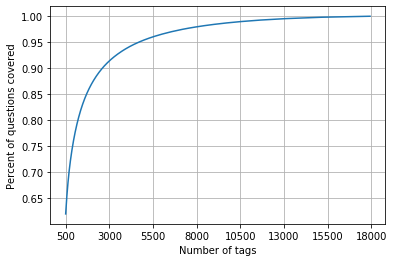

In [398]:
pdf = tags_count_series.values/np.sum(tags_count_series.values)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots()
ax.plot(cdf[500:])
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
# plt.plot(list(cdf), label="Cumulutive distribution of tags count")
plt.xlabel("Number of tags")
plt.ylabel("Percent of questions covered")
plt.grid()
plt.show()

if we take top 5500 tags then we can cover 96% of questions.

In [404]:
top_tags = tags_count_series[:5500]

print("Number of tags : ", len(tags_name))

print("Number of tags taken 5500 : {}%".format(np.round((len(top_tags)*100/len(tags_name)),2)))

Number of tags :  35346
Number of tags taken 5500 : 15.56%


Considering top 15% tags which will explain 96% data.

In [3]:
data = pd.read_csv("data_preprocessed.csv")

In [4]:
data = data.iloc[:,1:]

<h2> 4.2 Split the data into test and train</h2>

In [28]:
def get_n_tags(n):
    tags_count = tags.sum(axis=0).A1
    sorted_count = sorted(range(len(tags_count)), key= lambda i: tags_count[i], reverse=True)
    top_tags = tags[:,sorted_count[0:n]]
    return top_tags

X = data["question"].values
y = get_n_tags(500)

X_train = X[:400000]
X_test = X[400000:500000]

y_train = y[0:400000]   
y_test = y[400000:500000]

print("Dimensions of Train data : X = {}, Y={}".format(X_train.shape, y_train.shape))
print("Dimensions of Test data : X = {}, Y={}".format(X_test.shape, y_test.shape))

Dimensions of Train data : X = (400000,), Y=(400000, 500)
Dimensions of Test data : X = (100000,), Y=(100000, 500)


<h2>4.3 Featurizing data </h2>

In [29]:
tf_idf = TfidfVectorizer(tokenizer = lambda x: x.split(), min_df=5, max_features=100000, smooth_idf=True, ngram_range=(1,3))

X_train_vec = tf_idf.fit_transform(X_train)
X_test_vec = tf_idf.transform(X_test)

In [30]:
print("Dimensions of X_train after vectorization: ", X_train_vec.shape)
print("Dimensions of X_test after vectorization: ", X_test_vec.shape)


Dimensions of X_train after vectorization:  (400000, 100000)
Dimensions of X_test after vectorization:  (100000, 100000)


#### ML model 

In [63]:
model = LogisticRegression(penalty="l2")
clf = OneVsRestClassifier(model,n_jobs=-1)
clf.fit(X_train_vec,y_train)
pred = clf.predict(X_test_vec)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)

In [69]:
print("Accuracy score is : ",metrics.accuracy_score(y_test, pred))
print("Hamming distance loss is : ", metrics.hamming_loss(y_test, pred))

print()
print("Precision score is : ", metrics.precision_score(y_test, pred, average="micro"))
print("Recall score is : ", metrics.recall_score(y_test, pred, average="micro"))
print("F1 micro score is : ", metrics.f1_score(y_test, pred, average="micro"))

print()
print(" Classification report : ")
print(metrics.classification_report(y_test, pred))

Accuracy score is :  0.21855
Hamming distance loss is :  0.0028203

Precision score is :  0.846815866084425
Recall score is :  0.25980674009277815
F1 micro score is :  0.39762149878042

 Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.36      0.50      7767
           1       0.87      0.41      0.56      6745
           2       0.90      0.53      0.66      6625
           3       0.84      0.41      0.55      6100
           4       0.97      0.70      0.81      5369
           5       0.90      0.62      0.74      5265
           6       0.86      0.22      0.35      3366
           7       0.93      0.53      0.67      3109
           8       0.83      0.37      0.51      3147
           9       0.88      0.36      0.51      2950
          10       0.92      0.56      0.70      2792
          11       0.74      0.20      0.32      2789
          12       0.72      0.11      0.20      2747
          13       0.73      0.

<h2> Conslusion:</h2>

Due to lack of computational power more complex models like RandomForest, XGBoost cant be used, as we have to train 500 models 
and dimensionality of data is also very high. 

Because of which I have to stick with just one model LogisticRegression as it computionally cheap build and train these models.

Hence by using Logistic model the results are so so-

1] Precision is high but at the very same time recall is low
2] F1 Score is also mediocre.

The reason behind this is we have only use 500 tags out of 42k tags as the model can be trained on power limited laptops.